In [171]:
import os

import numpy as np
from info import i, printb, printr, printp, print
from utils import get_samples_id_perSet, get_features_from_samples, get_GT_labels_fromFiles, labels2binary, SVM_Classification_inSplittedSets
# get_samples_id_perSet, get_features_from_samples, get_GT_labels_fromFiles, labels2binary, SVM_Classification_inSplittedSets


In [30]:
#def main():
#----------------------------------- parameters to change-----------------------------------#
block_size=60 # blocks of 60 seconds
path_workingFolder='C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
labels2read= 'labels_BeeNotBee_th0'
feature = 'MFCCs20'
#-------------------------------------------------------------------------------------------#



#Feature extraction: 
sample_ids_test, sample_ids_train, sample_ids_val = get_samples_id_perSet(path_workingFolder+'split_random_0.json') 

X_train = get_features_from_samples(path_workingFolder, sample_ids_train, 'MFCCs20', 'NO', 1)
X_val = get_features_from_samples(path_workingFolder, sample_ids_val, 'MFCCs20', 'NO', 1)
X_test = get_features_from_samples(path_workingFolder, sample_ids_test, 'MFCCs20', 'NO', 1)


labels_train = get_GT_labels_fromFiles(path_workingFolder, sample_ids_train, labels2read)
Y_train= labels2binary('nobee', labels_train)
labels_val = get_GT_labels_fromFiles(path_workingFolder, sample_ids_val, labels2read)
Y_val= labels2binary('nobee', labels_val)
labels_test = get_GT_labels_fromFiles(path_workingFolder, sample_ids_test, labels2read)
Y_test= labels2binary('nobee', labels_test)



In [146]:
X_flat_train=np.concatenate((X_train , X_val))
Y_flat_train=np.concatenate((Y_train , Y_val))
nsamples, nx, ny= X_flat_train.shape
X_flat_train= X_flat_train.reshape(nsamples, nx*ny)
print("X_flat_train: ",X_flat_train.shape)
Y_flat_train= np.array(Y_flat_train)
print("Y_train : ", Y_flat_train.shape )

[2020-04-09 22:35:53 RAM80.3% 1.66GB] X_flat_train:  (337, 51680)
[2020-04-09 22:35:53 RAM80.3% 1.66GB] Y_train :  (337,)


In [147]:
X_flat_train.shape

(337, 51680)

In [164]:
X_test_=np.array(X_test).reshape(38,51680)
X_test_.shape

(38, 51680)

In [165]:
clf, y_pred_proba_train, y_pred_train, y_pred_proba_test, y_pred_test= SVM_Classification_inSplittedSets(X_flat_train, Y_flat_train, X_test_, Y_test, kerneloption='rbf')


[2020-04-09 22:46:00 RAM75.4% 1.49GB] Starting classification with SVM:


In [177]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score( Y_test, y_pred_test))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred_test))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred_test))

[2020-04-09 23:15:13 RAM65.9% 0.72GB] Accuracy:  0.7894736842105263
[2020-04-09 23:15:13 RAM65.9% 0.72GB] Precision: 0.7894736842105263
[2020-04-09 23:15:13 RAM65.9% 0.72GB] Recall: 1.0


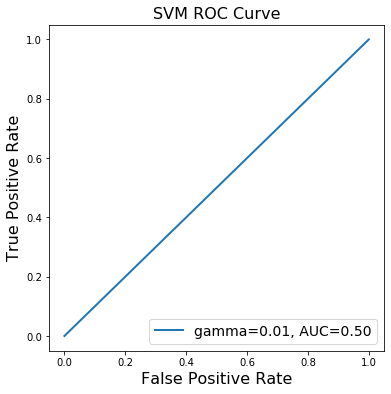

In [178]:
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Y_test, y_pred_test)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()